=== Smart Fuzzing with Code Coverage ===
Creating and training model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6540 - loss: 1.3690

🚀 Starting Smart Fuzzing...
Iteration | New Neurons | Total Coverage
----------------------------------------
       0 |          36 |             36
       5 |           0 |             47
      10 |           0 |             47
      15 |           0 |             48
      20 |           0 |             48
      25 |           0 |             48

✅ Completed! Final coverage: 48/64 neurons


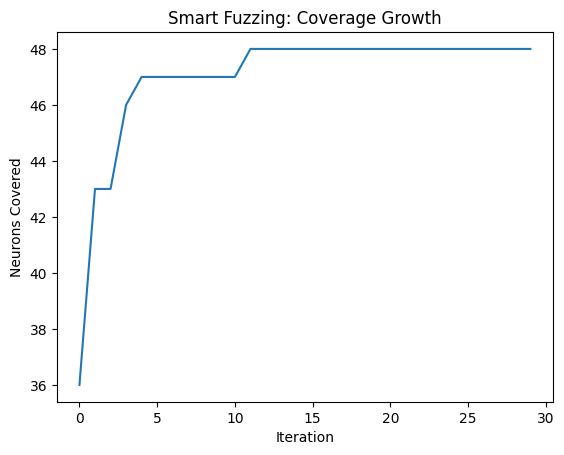

🎯 Coverage grew from 36 to 48 neurons
💡 This demonstrates how coverage guides smart fuzzing!


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random

def create_and_train_model():
    """Create and train a simple model - FIXED VERSION"""
    print("Creating and training model...")
    
    # Load and prepare data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    
    # Build a simpler model with explicit input
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', name='coverage_layer')(x)  # Named layer for easy access
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Quick training
    model.fit(x_train[:1000], y_train[:1000], 
              epochs=1, batch_size=32, verbose=1)
    
    return model, (x_test, y_test)

class SmartCoverage:
    """Fixed coverage tracker that properly accesses model layers"""
    def __init__(self, model):
        self.model = model
        self.covered_neurons = set()
        # Create intermediate model for the specific layer
        self.intermediate_model = tf.keras.Model(
            inputs=model.input,
            outputs=model.get_layer('coverage_layer').output
        )
    
    def update(self, input_data):
        try:
            # Get activations from the specific layer
            activations = self.intermediate_model.predict(input_data, verbose=0)[0]
            # Track which neurons activate
            new_neurons = set(np.where(activations > 0.5)[0]) - self.covered_neurons
            self.covered_neurons.update(new_neurons)
            return len(new_neurons), len(self.covered_neurons)
        except Exception as e:
            print(f"Coverage error: {e}")
            return 0, len(self.covered_neurons)

class SmartMutator:
    """Creates intelligent input variations"""
    def mutate(self, img):
        strategy = random.choice([1, 2, 3])
        if strategy == 1:
            return self._add_noise(img)
        elif strategy == 2:
            return self._adjust_contrast(img)
        else:
            return self._crop_rotate(img)
    
    def _add_noise(self, img):
        noise = np.random.normal(0, 0.15, img.shape)
        return np.clip(img + noise, 0, 1)
    
    def _adjust_contrast(self, img):
        factor = np.random.uniform(0.8, 1.2)
        return np.clip(img * factor, 0, 1)
    
    def _crop_rotate(self, img):
        # Simple transformation
        return np.rot90(img, random.randint(0, 3))

def run_smart_fuzzing():
    """Main function - completely fixed"""
    print("=== Smart Fuzzing with Code Coverage ===")
    
    # Create model and data
    model, (x_test, y_test) = create_and_train_model()
    
    # Initialize components
    coverage = SmartCoverage(model)
    mutator = SmartMutator()
    
    # Start with seed images
    seeds = [x_test[i] for i in range(5)]
    corpus = seeds.copy()
    coverage_history = []
    
    print("\n🚀 Starting Smart Fuzzing...")
    print("Iteration | New Neurons | Total Coverage")
    print("-" * 40)
    
    for iteration in range(30):  # Reduced iterations for speed
        # Pick a random seed
        seed_img = random.choice(corpus)
        
        # Mutate
        mutant = mutator.mutate(seed_img)
        
        # Get coverage feedback
        new_neurons, total_neurons = coverage.update(mutant.reshape(1, 28, 28, 1))
        
        # Smart decision: only keep if it increases coverage
        if new_neurons > 0:
            corpus.append(mutant)
        
        coverage_history.append(total_neurons)
        
        if iteration % 5 == 0:
            print(f"{iteration:8} | {new_neurons:11} | {total_neurons:14}")
    
    # Results
    print(f"\n✅ Completed! Final coverage: {coverage_history[-1]}/64 neurons")
    
    # Simple visualization
    plt.plot(coverage_history)
    plt.title('Smart Fuzzing: Coverage Growth')
    plt.xlabel('Iteration')
    plt.ylabel('Neurons Covered')
    plt.show()
    
    return coverage_history

if __name__ == "__main__":
    coverage_data = run_smart_fuzzing()
    print(f"🎯 Coverage grew from {coverage_data[0]} to {coverage_data[-1]} neurons")
    print("💡 This demonstrates how coverage guides smart fuzzing!")